In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import subprocess
import os
import pickle

from spam_cluster import get_response_times

# Set the working directory to the root of the project
current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, os.pardir))
os.chdir(parent_dir)

print(f'Current working directory: {os.getcwd()}')

divide_at = 3

interval = 1000
rps = 120
random_rps = False
# every = 3
initial_rps = rps

url = f"http://localhost:31923/predict"
USERS = 5
recordings = 30
time_step = 5

# apis = 3
command = ['python', 'code/spam_cluster.py', '--users', str(rps), '--interval', str(interval)]

Current working directory: /home/jprodanov/resource-elastisity-nancy


In [2]:
# Set latex rendering
from matplotlib import rc

rc('text', usetex=True)
rc('font', **{'family': 'serif', 'serif': ['Times New Roman']})

In [3]:
hpa_rts = []
hpa_container_recordings = [] # Idk?


In [12]:

spam_process = subprocess.Popen(command)

for i in range(recordings):
    start_time = time.time()
    rts = np.mean([rt for rt in get_response_times(USERS, f'{url}') if rt is not None])
    mean_rt = rts
    hpa_rts.append(mean_rt)

    # node_recordings = []
    # for node in nodes:
    #     for container_id, (_, _, _) in list(node.get_containers().items()):
    #         (cpu_limit, cpu, cpu_percentage), (_, _, _), (_, _), _ = node.get_container_usage(container_id)
    #         node_recordings.append((cpu_limit, cpu, cpu_percentage))
    # mdqn_container_recordings.append(node_recordings)

    elapsed_time = time.time() - start_time
    time.sleep(max(0, time_step - elapsed_time))

spam_process.terminate()
# infer_process.terminate()

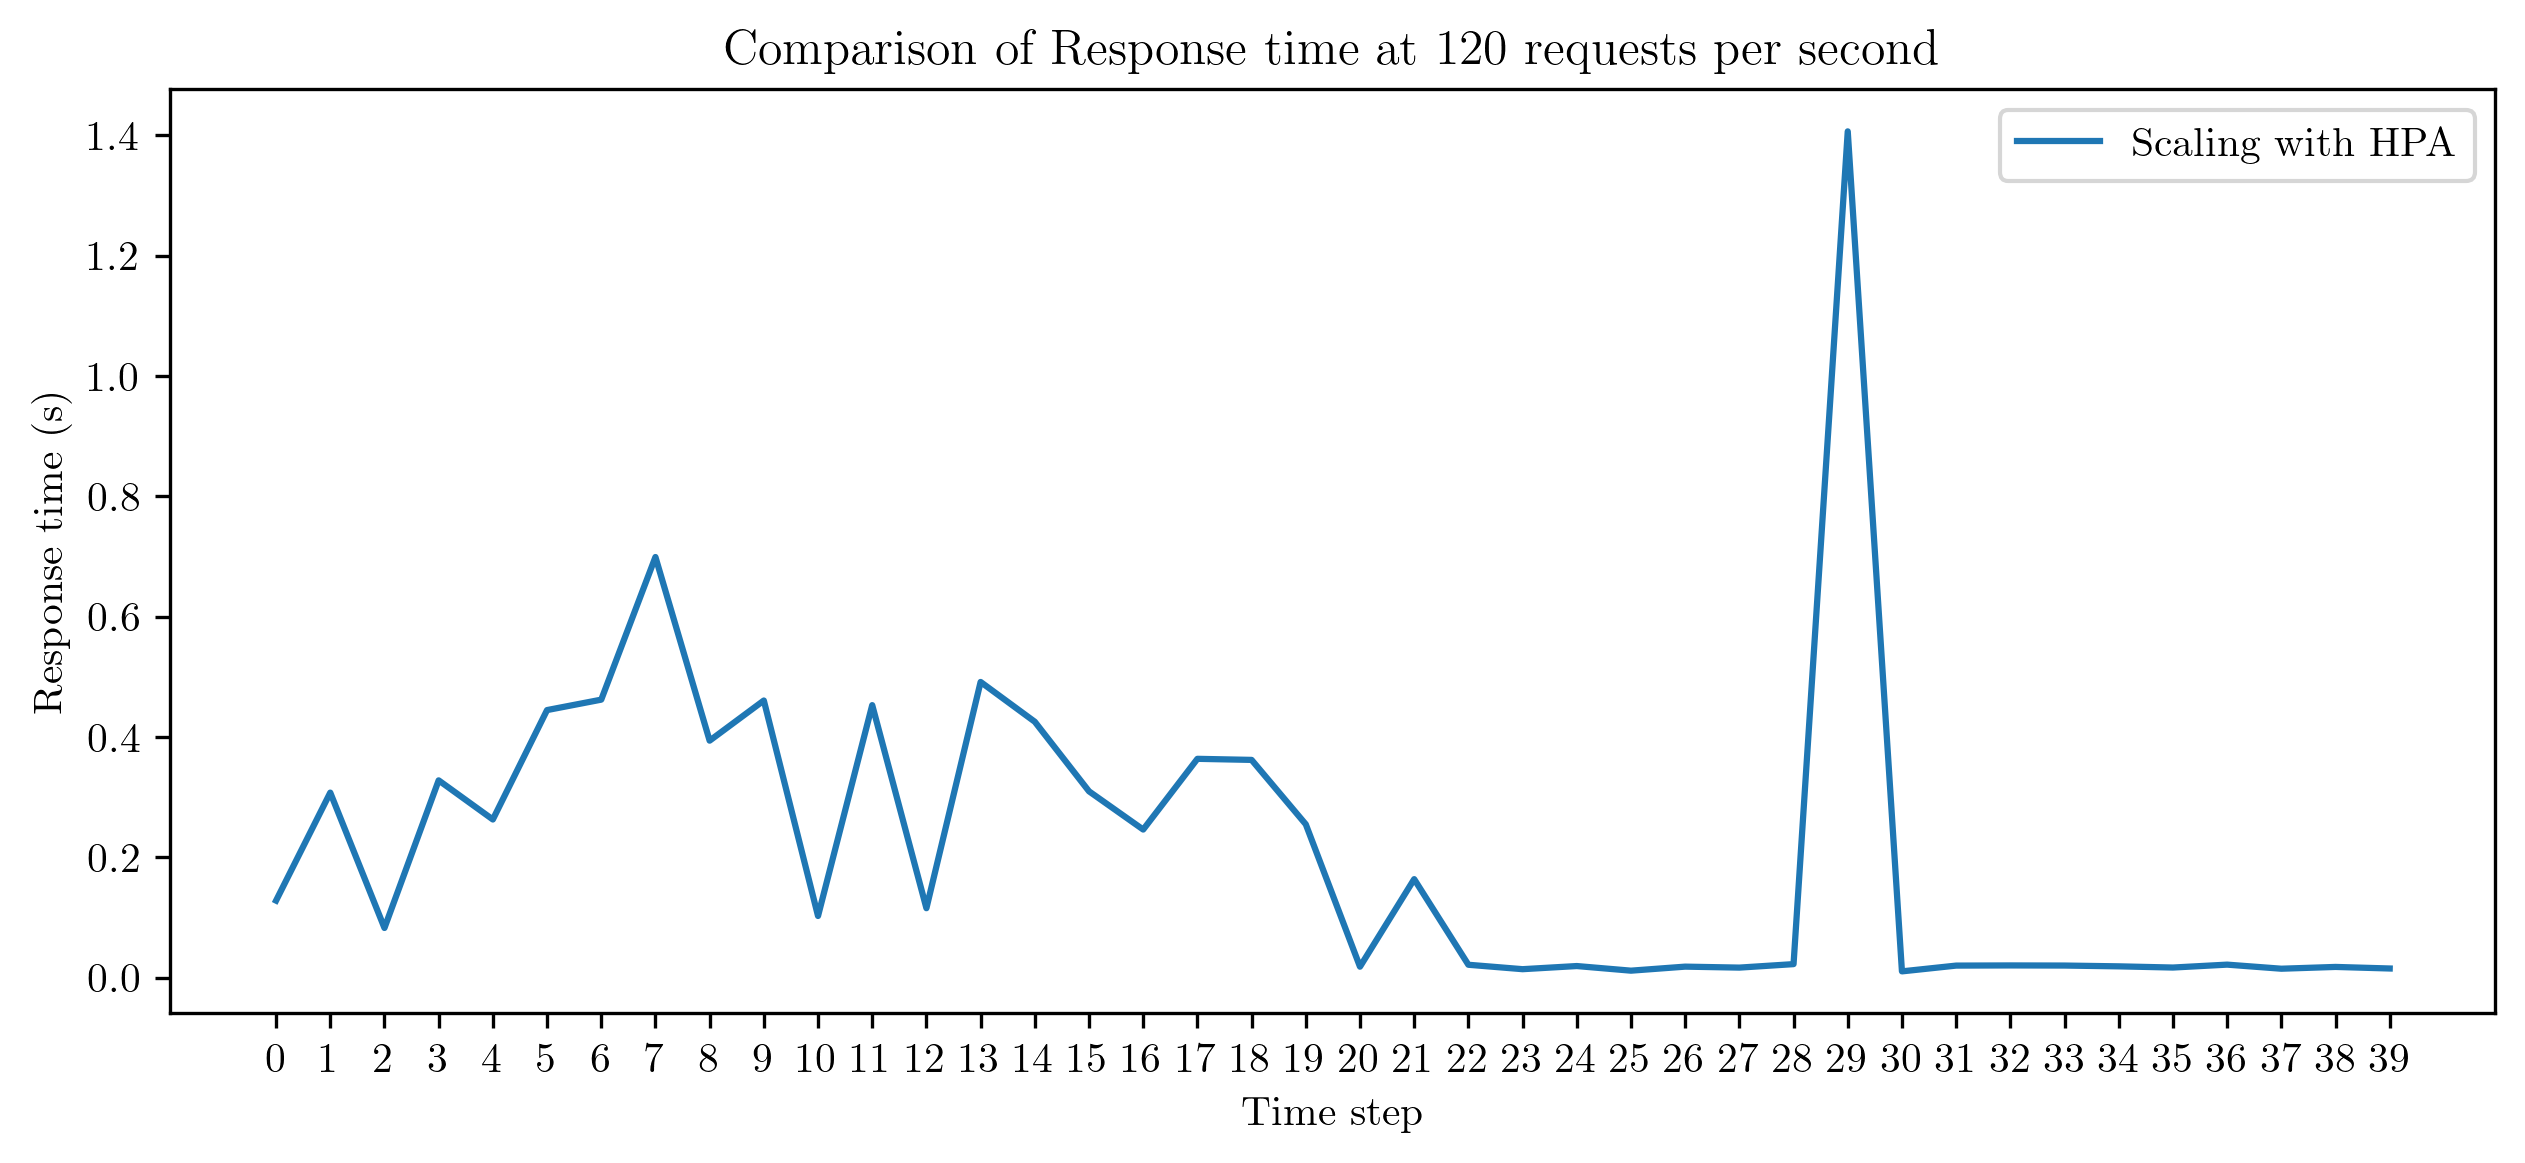

In [13]:
plt.figure(figsize=(10, 4), dpi=300)
plt.plot(hpa_rts, label='Scaling with HPA')
# plt.plot(ddpg_latenices, label='Multi DDPG')

# middle_x = len(mdqn_rts) // divide_at
# plt.axvline(x=middle_x, color='r', linestyle='--', label='Dynamic in-place scaling')

plt.xlabel('Time step')
# plt.yscale('log')
plt.ylabel('Response time (s)')
# plt.ylim(0, 0.2)
plt.title(f'Comparison of Response time at {initial_rps} requests per second')
plt.legend()

plt.xticks(range(len(hpa_rts)))

plt.show()